In [1]:
# https://namethatchart.herokuapp.com/db2csv
import pandas as pd
df = pd.read_csv('data/data-17-07-2017.csv', sep=',', index_col=[0])

In [2]:
df[:5]

,UserID,UserIP,Timestamp,DateTime,Event,ImageID,Type
LogID,,,,,,,
37,1,127.0.0.1,1499958547,2017-07-13 17:09:07.993,page loaded,35,None
38,1,127.0.0.1,1499958550,2017-07-13 17:09:10.518,started typing,35,None
39,1,127.0.0.1,1499958554,2017-07-13 17:09:14.207,submitted,35,pie chart
40,1,127.0.0.1,1499958554,2017-07-13 17:09:14.821,page loaded,36,None
41,1,127.0.0.1,1499958556,2017-07-13 17:09:16.282,started typing,36,None


In [3]:
df.columns

Index(['UserID', 'UserIP', 'Timestamp', 'DateTime', 'Event', 'ImageID',
       'Type'],
      dtype='object')

In [12]:
import numpy as np
import pandas as pd # package for working with data frames in python
import seaborn as sns # package for visualization (more on seaborn later)

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set(color_codes=True)

In [13]:
# Distribution by ImageID
sns.distplot(df.ImageID)

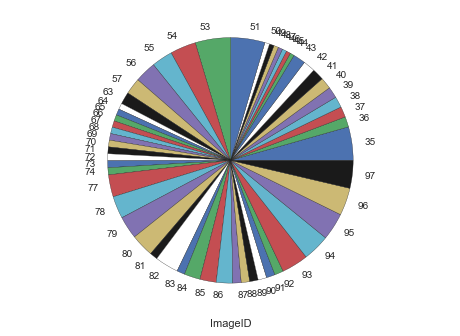

In [11]:
sums = df.ImageID.groupby(df.ImageID).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [6]:
url = "https://namethatchart.herokuapp.com/db2csv"
c=pd.read_csv(url)

In [7]:
c

,[[ '15','1','127.0.0.1','1500370828','2017-07-18 11:40:28.201','page loaded','15','None'],[ '16','1'.1,...,'119'.11,'None'].313,[ '362','1'.340,'127.0.0.1'.340,'1500454272','2017-07-19 10:51:12.283','page loaded'.262,'121'.8,'None'] ]


TypeError: unhashable type: 'slice'